In [1]:
import numpy as np 
import pandas as pd

In [2]:
df=pd.read_csv("/kaggle/input/playstore-dataset/googleplaystore.csv")

In [3]:
print(df.shape)

(10841, 13)


In [4]:
print(df.columns)
print(df.head())

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+ 

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.select_dtypes(include=['number']).var()

Rating    0.288832
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(10358, 13)

In [10]:
df['Type'].fillna(
    df.apply(lambda x: 'Paid' if str(x['Price']).replace('$','').replace(',','').strip() not in 
             ['0','0.0','Free','NaN','nan',''] else 'Free', axis=1), inplace=True)

/tmp/ipykernel_38/2894120695.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna(


In [11]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
df = df.dropna(subset=['Content Rating'])

In [13]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [14]:
df.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)

In [15]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

In [16]:
print(df['Rating'].describe())
print(df['Content Rating'].describe())
print(df['Content Rating'].value_counts())

count    8892.000000
mean        4.187877
std         0.522377
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64
count        10357
unique           6
top       Everyone
freq          8382
Name: Content Rating, dtype: object
Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64


In [17]:
df['Rating'].mean()

4.187876743139901

In [18]:
df["Category"].value_counts()

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [19]:


from sklearn.ensemble import RandomForestRegressor
import warnings


warnings.filterwarnings('ignore')

print(df.isnull().sum())


df = df[df['Category'] != '1.9'].copy()
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


df['Reviews'] = pd.to_numeric(df['Reviews'].astype(str), errors='coerce')

df['Installs'] = df['Installs'].astype(str).str.replace(r'[,+]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


df['Size'] = df['Size'].apply(lambda x: 
    float(str(x).replace('M', '')) if 'M' in str(x) 
    else (float(str(x).replace('k', '')) / 1024 if 'k' in str(x) 
    else np.nan)
)




for col in ['Type', 'Content Rating', 'Genres', 'Category']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

df_processed = pd.get_dummies(df, columns=['Category', 'Type', 'Content Rating', 'Genres'])


feature_columns = df_processed.columns.drop(['Rating', 'App', 'Last Updated'], errors='ignore')

df_train = df_processed[df_processed['Rating'].notnull()]
X_train = df_train[feature_columns]
y_train = df_train['Rating']

df_to_predict = df_processed[df_processed['Rating'].isnull()]
X_predict = df_to_predict[feature_columns]


X_train = X_train.fillna(0)
X_predict = X_predict.fillna(0)



model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, min_samples_leaf=5)
model.fit(X_train, y_train)


if not X_predict.empty:
    predicted_ratings = model.predict(X_predict)
    df.loc[df['Rating'].isnull(), 'Rating'] = np.round(predicted_ratings, 1)
print("'Rating' imputation complete.")

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64
'Rating' imputation complete.


In [20]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1526
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [21]:

df['Size'] = df['Size'].fillna(df.groupby('Category')['Size'].transform('median'))
df['Size'] = df['Size'].fillna(df['Size'].median())

In [22]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

In [23]:
df["App"].describe()

count      10357
unique      9659
top       ROBLOX
freq           9
Name: App, dtype: object

In [24]:

df['Last_Updated'] = pd.to_datetime(df['Last Updated'])
df['Update_Year'] = df['Last_Updated'].dt.year
df['Update_Month'] = df['Last_Updated'].dt.month
df['Days_Since_Update'] = (pd.Timestamp.now(tz='UTC') - df['Last_Updated'].dt.tz_localize('UTC')).dt.days




df['Engagement_Rate'] = np.where(df['Installs'] > 0, df['Reviews'] / df['Installs'], 0)



bins = [0, 10000, 1000000, 100000000, 1000000000, 10000000001]
labels = ['Low (0-10k)', 'Medium (10k-1M)', 'High (1M-100M)', 'Very High (100M-1B)', 'Massive (1B+)']
df['Install_Tier'] = pd.cut(df['Installs'], bins=bins, labels=labels, right=False)




df[['Primary_Genre', 'Secondary_Genre']] = df['Genres'].str.split(';', n=1, expand=True)
df['Secondary_Genre'] = df['Secondary_Genre'].fillna('None')



df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                10357 non-null  object        
 1   Category           10357 non-null  object        
 2   Rating             10357 non-null  float64       
 3   Reviews            10357 non-null  int64         
 4   Size               10357 non-null  float64       
 5   Installs           10357 non-null  int64         
 6   Type               10357 non-null  object        
 7   Price              10357 non-null  float64       
 8   Content Rating     10357 non-null  object        
 9   Genres             10357 non-null  object        
 10  Last Updated       10357 non-null  object        
 11  Last_Updated       10357 non-null  datetime64[ns]
 12  Update_Year        10357 non-null  int32         
 13  Update_Month       10357 non-null  int32         
 14  Days_Since_

Top 15 Categories by Total Installs:
Category
GAME                   31544024415
COMMUNICATION          24152276251
SOCIAL                 12513867902
PRODUCTIVITY           12463091369
TOOLS                  11452771915
FAMILY                 10041692505
PHOTOGRAPHY             9721247655
TRAVEL_AND_LOCAL        6361887146
VIDEO_PLAYERS           6222002720
NEWS_AND_MAGAZINES      5393217760
SHOPPING                2573348785
ENTERTAINMENT           2455660000
PERSONALIZATION         2074494782
BOOKS_AND_REFERENCE     1916469576
SPORTS                  1528574498
Name: Installs_Numeric, dtype: int64

Generated 'category_installs_plot.png'


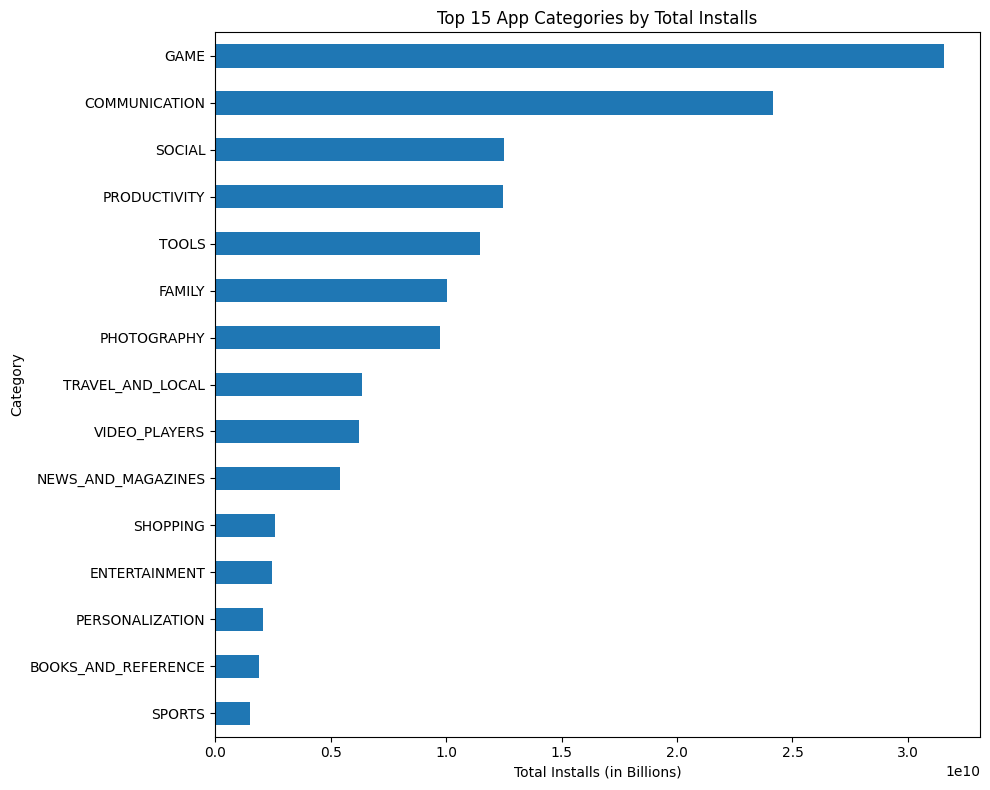

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
installs_numeric = pd.to_numeric(df['Installs'].astype(str).str.replace(r'[,+]', '', regex=True), errors='coerce')
installs_numeric.name = 'Installs_Numeric'


temp_df = df[['Category']].join(installs_numeric)

category_installs = temp_df.groupby('Category')['Installs_Numeric'].sum().sort_values(ascending=False)


print("Top 15 Categories by Total Installs:")
print(category_installs.head(15))


plt.figure(figsize=(10, 8))

category_installs.head(15).sort_values(ascending=True).plot(kind='barh')

plt.title('Top 15 App Categories by Total Installs')
plt.xlabel('Total Installs (in Billions)')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('category_installs_plot.png')

print("\nGenerated 'category_installs_plot.png'")

Generated 'rating_vs_installs_barchart_CLEAN.png'


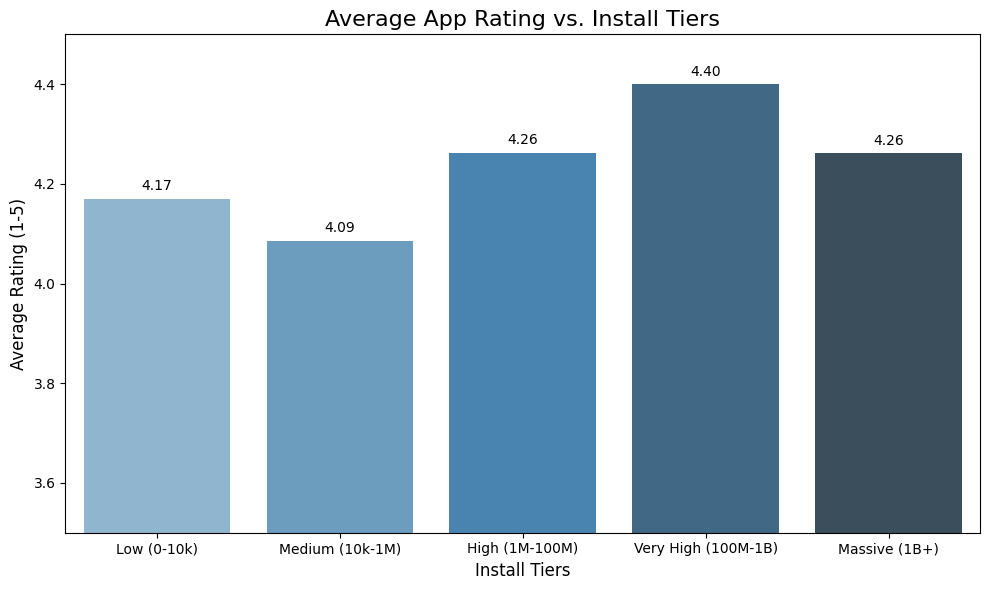

In [26]:

bins = [0, 10000, 1000000, 100000000, 1000000000, 10000000001]
labels = ['Low (0-10k)', 'Medium (10k-1M)', 'High (1M-100M)', 'Very High (100M-1B)', 'Massive (1B+)']


df['Install_Tier'] = pd.cut(df['Installs'], bins=bins, labels=labels, right=False)

mean_ratings = df.groupby('Install_Tier')['Rating'].mean().dropna().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Install_Tier',
    y='Rating',
    data=mean_ratings,
    palette='Blues_d'
)

plt.title('Average App Rating vs. Install Tiers', fontsize=16)
plt.xlabel('Install Tiers', fontsize=12)
plt.ylabel('Average Rating (1-5)', fontsize=12)

plt.ylim(3.5, 4.5)


for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 9), 
        textcoords='offset points'
    )

plt.tight_layout()
plt.savefig('rating_vs_installs_barchart_CLEAN.png')

print("Generated 'rating_vs_installs_barchart_CLEAN.png'")


df = df.drop(columns=['Install_Tier'])

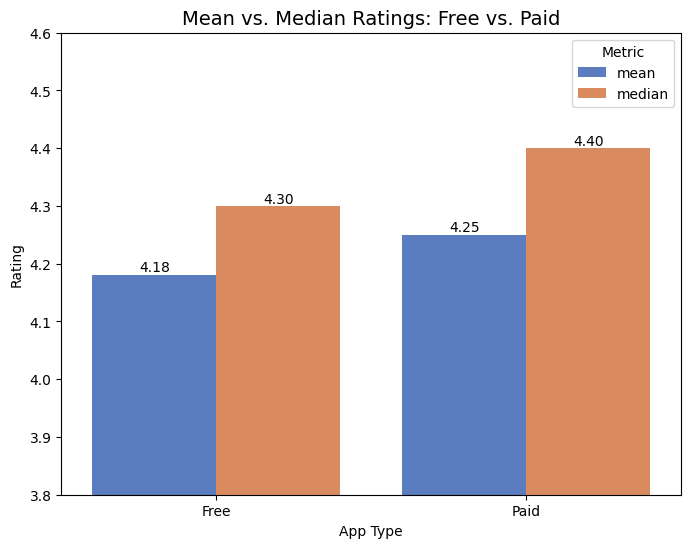

In [27]:
rating_comparison = df.groupby('Type')['Rating'].agg(['mean', 'median'])
rating_comparison = rating_comparison.reset_index()


rating_melted = rating_comparison.melt(id_vars='Type', value_vars=['mean', 'median'], 
                                       var_name='Metric', value_name='Rating')


plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Rating', hue='Metric', data=rating_melted, palette='muted')

plt.title('Mean vs. Median Ratings: Free vs. Paid', fontsize=14)
plt.ylim(3.8, 4.6) 
plt.ylabel('Rating')
plt.xlabel('App Type')

# Add labels
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

plt.show()

In [28]:
rating_comparison = df.groupby('Type')['Rating'].agg(['mean', 'median'])
rating_comparison['difference'] = rating_comparison['mean'] - rating_comparison['median']
print(rating_comparison)

          mean  median  difference
Type                              
Free  4.180786     4.3   -0.119214
Paid  4.250588     4.4   -0.149412


--- Analyzing Ratings for Free vs. Paid Apps ---
          mean  median  count
Type                         
Free  4.180786     4.3   9592
Paid  4.250588     4.4    765

Generated 'free_vs_paid_barchart.png'


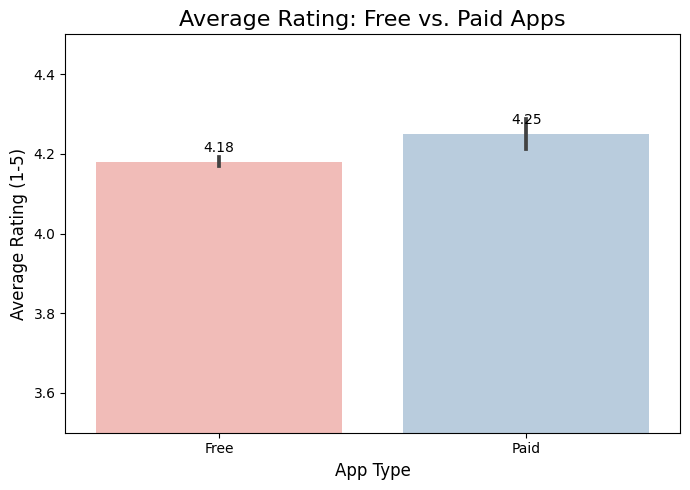

In [29]:

print("--- Analyzing Ratings for Free vs. Paid Apps ---")


plot_df = df[df['Type'].isin(['Free', 'Paid'])]


grouped_stats = plot_df.groupby('Type')['Rating'].agg(['mean', 'median', 'count'])
print(grouped_stats)


plt.figure(figsize=(7, 5))
ax = sns.barplot(
    x='Type',
    y='Rating',
    data=plot_df,
    palette='Pastel1'
)

plt.title('Average Rating: Free vs. Paid Apps', fontsize=16)
plt.xlabel('App Type', fontsize=12)
plt.ylabel('Average Rating (1-5)', fontsize=12)


plt.ylim(3.5, 4.5)


ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', padding=5)

plt.tight_layout()
plt.savefig('free_vs_paid_barchart.png')

print("\nGenerated 'free_vs_paid_barchart.png'")

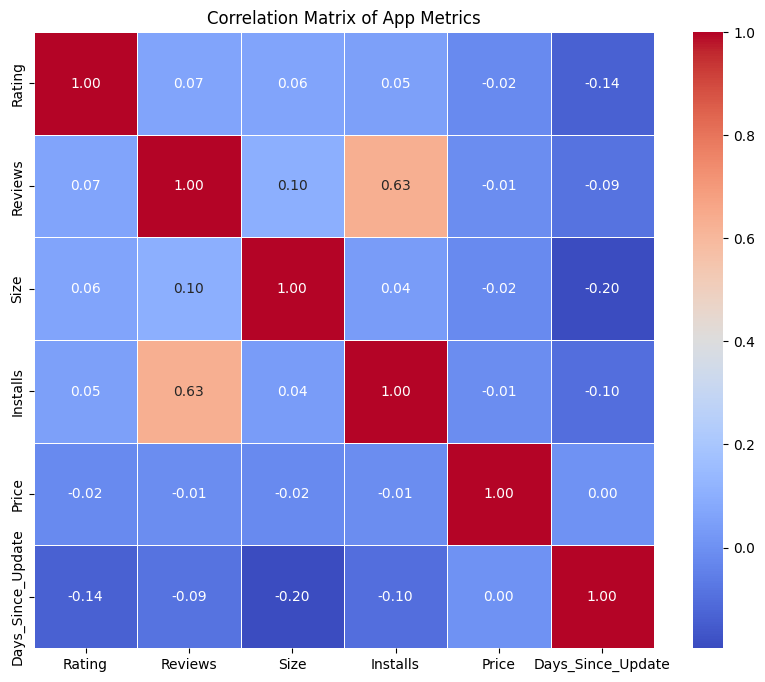

Correlation with Installs:
 Installs             1.000000
Reviews              0.634997
Rating               0.049129
Size                 0.036963
Price               -0.011147
Days_Since_Update   -0.098674
Name: Installs, dtype: float64


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
# Ensure 'Installs', 'Price', 'Reviews', 'Size' are numeric as per your cleaning
numeric_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Days_Since_Update']

# Calculate correlation
corr = df[numeric_cols].corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of App Metrics')
plt.show()

# Insight print
print("Correlation with Installs:\n", corr['Installs'].sort_values(ascending=False))

                     Installs    Rating   App
Content Rating                               
Everyone 10+     2.968507e+07  4.249867   377
Teen             2.697930e+07  4.235689  1146
Everyone         1.195772e+07  4.179456  8382
Mature 17+       9.598874e+06  4.125056   447
Adults only 18+  6.666667e+05  4.300000     3
Unrated          2.525000e+04  4.250000     2


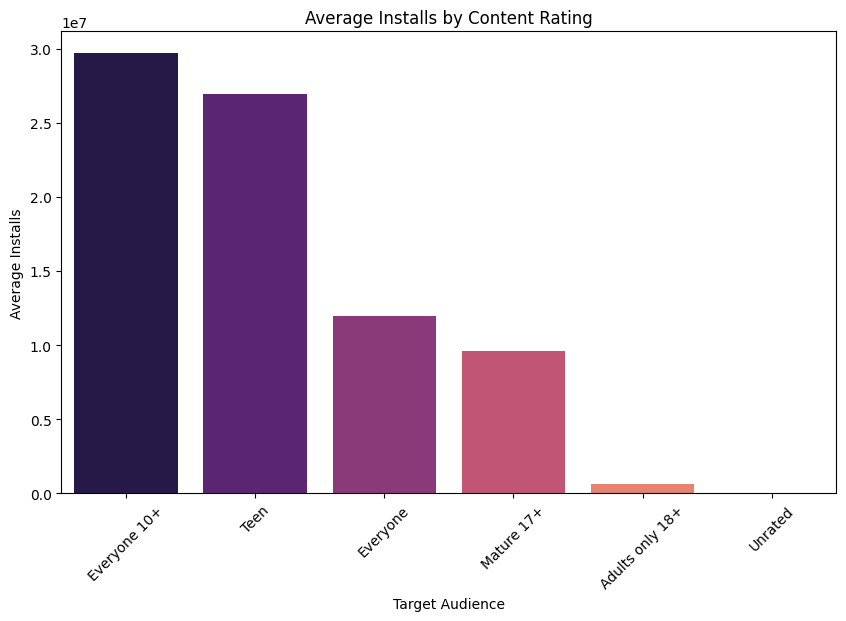

In [31]:
# Group by Content Rating to see average Installs and Rating
content_rating_stats = df.groupby('Content Rating').agg({
    'Installs': 'mean',
    'Rating': 'mean',
    'App': 'count'
}).sort_values(by='Installs', ascending=False)

print(content_rating_stats)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=content_rating_stats.index, y='Installs', data=content_rating_stats, palette='magma')
plt.title('Average Installs by Content Rating')
plt.ylabel('Average Installs')
plt.xlabel('Target Audience')
plt.xticks(rotation=45)
plt.show()

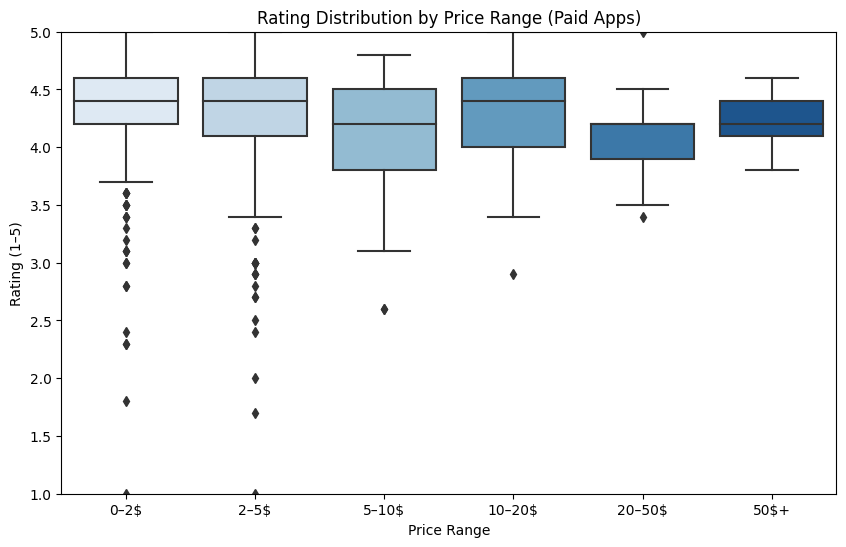

In [32]:
paid_apps = df[df['Type'] == 'Paid'].copy()

# Create price bins
bins = [0, 2, 5, 10, 20, 50, 200]
labels = ["0–2$", "2–5$", "5–10$", "10–20$", "20–50$", "50$+"]

paid_apps["Price_Range"] = pd.cut(paid_apps["Price"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Price_Range", y="Rating", data=paid_apps, palette="Blues")
plt.title("Rating Distribution by Price Range (Paid Apps)")
plt.xlabel("Price Range")
plt.ylabel("Rating (1–5)")
plt.ylim(1, 5)
plt.show()


In [33]:
review=pd.read_csv("/kaggle/input/reviews/googleplaystore_user_reviews.csv")

In [34]:
review.shape

(64295, 5)

In [35]:
cols_to_check = [col for col in review.columns if col != 'App']

review_clean = review.dropna(subset=cols_to_check, how='all')

In [36]:
review_clean.shape

(37432, 5)

In [37]:
review_clean.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [38]:
review_clean = review_clean.dropna(subset=['Translated_Review'])

In [39]:
review_clean.shape

(37427, 5)

In [40]:
review_clean = review_clean.drop_duplicates(subset=['App', 'Translated_Review'])

In [41]:
review_clean.shape

(29692, 5)

In [42]:
import re

# 2. Text Normalization Function
def normalize_text(text):
    # Ensure text is a string
    text = str(text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters (keep only a-z and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

review_clean['Cleaned_Review'] = review_clean['Translated_Review'].apply(normalize_text)

print("Preprocessing Complete.")
print(f"Final Row Count: {len(review_clean)}")
print(review_clean[['Translated_Review', 'Cleaned_Review']].head())

Preprocessing Complete.
Final Row Count: 29692
                                   Translated_Review  \
0  I like eat delicious food. That's I'm cooking ...   
1    This help eating healthy exercise regular basis   
3         Works great especially going grocery store   
4                                       Best idea us   
5                                           Best way   

                                      Cleaned_Review  
0  i like eat delicious food thats im cooking foo...  
1    this help eating healthy exercise regular basis  
3         works great especially going grocery store  
4                                       best idea us  
5                                           best way  


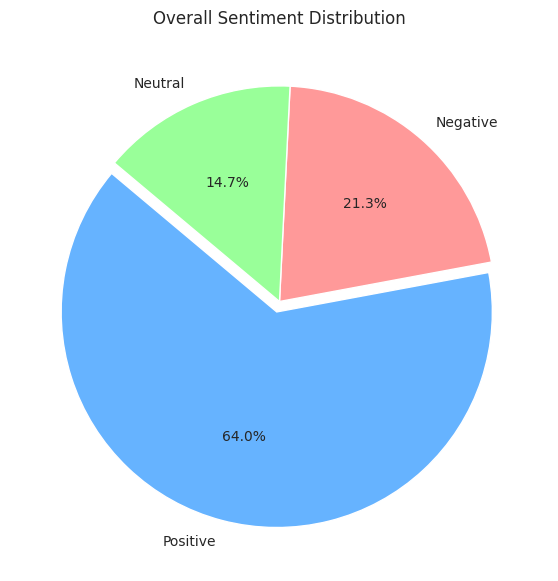

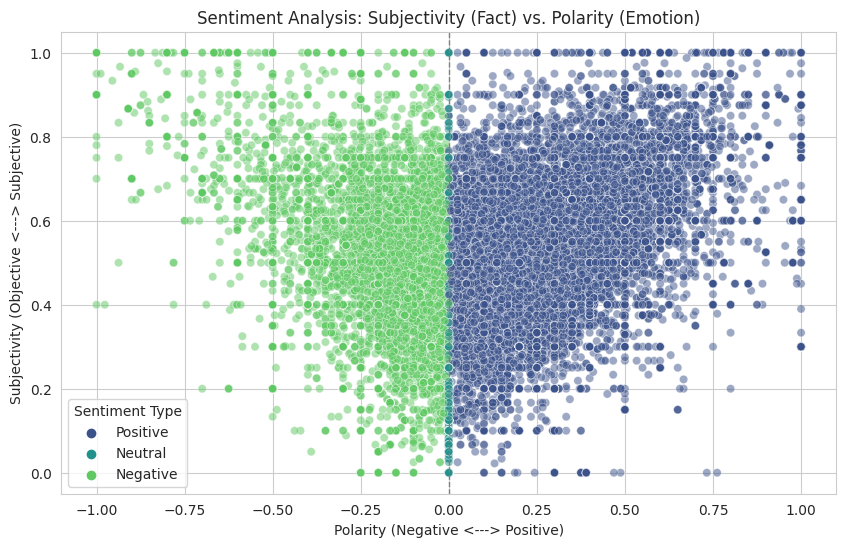

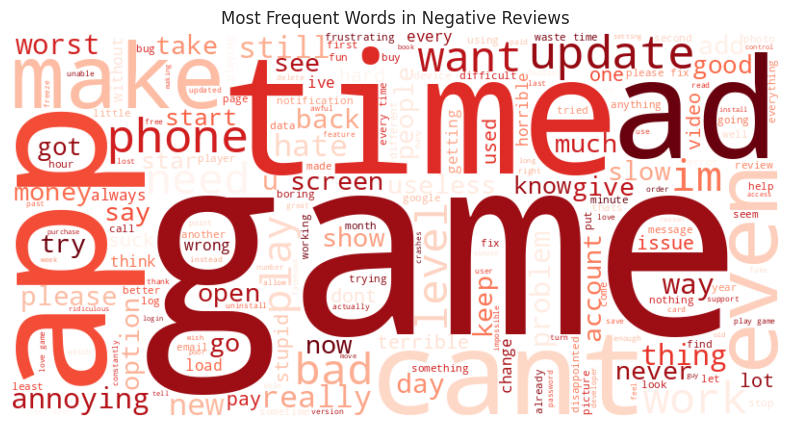

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set the visual style for professional charts
sns.set_style("whitegrid")

# CHART 1: THE SENTIMENT DISTRIBUTION (Slide 2)
plt.figure(figsize=(7, 7))
counts = review_clean['Sentiment'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', 
        startangle=140, colors=['#66b3ff', '#ff9999', '#99ff99'],
        explode=(0.05, 0, 0)) # Explode the biggest slice
plt.title('Overall Sentiment Distribution')
plt.show()

# CHART 2: SUBJECTIVITY VS POLARITY (Slide 4)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=review_clean, x='Sentiment_Polarity', y='Sentiment_Subjectivity', 
                hue='Sentiment', alpha=0.5, palette='viridis')
plt.axvline(0, color='grey', linestyle='--', linewidth=1)
plt.title('Sentiment Analysis: Subjectivity (Fact) vs. Polarity (Emotion)')
plt.xlabel('Polarity (Negative <---> Positive)')
plt.ylabel('Subjectivity (Objective <---> Subjective)')
plt.legend(title='Sentiment Type')
plt.show()

# CHART 3: THE NEGATIVE WORD CLOUD (Slide 5)
neg_text = " ".join(review for review in review_clean[review_clean['Sentiment'] == 'Negative']['Cleaned_Review'])

# Generate cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(neg_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Negative Reviews')
plt.show()

--- The Top 3 Most Reviewed Apps are: ---
['Facebook', 'Episode - Choose Your Story', 'Angry Birds Classic']

=== Facebook Stats ===
Total Reviews: 130
Mean Polarity: -0.01
Mean Subjectivity: 0.46
------------------------------
=== Episode - Choose Your Story Stats ===
Total Reviews: 124
Mean Polarity: 0.08
Mean Subjectivity: 0.48
------------------------------
=== Angry Birds Classic Stats ===
Total Reviews: 107
Mean Polarity: -0.02
Mean Subjectivity: 0.53
------------------------------


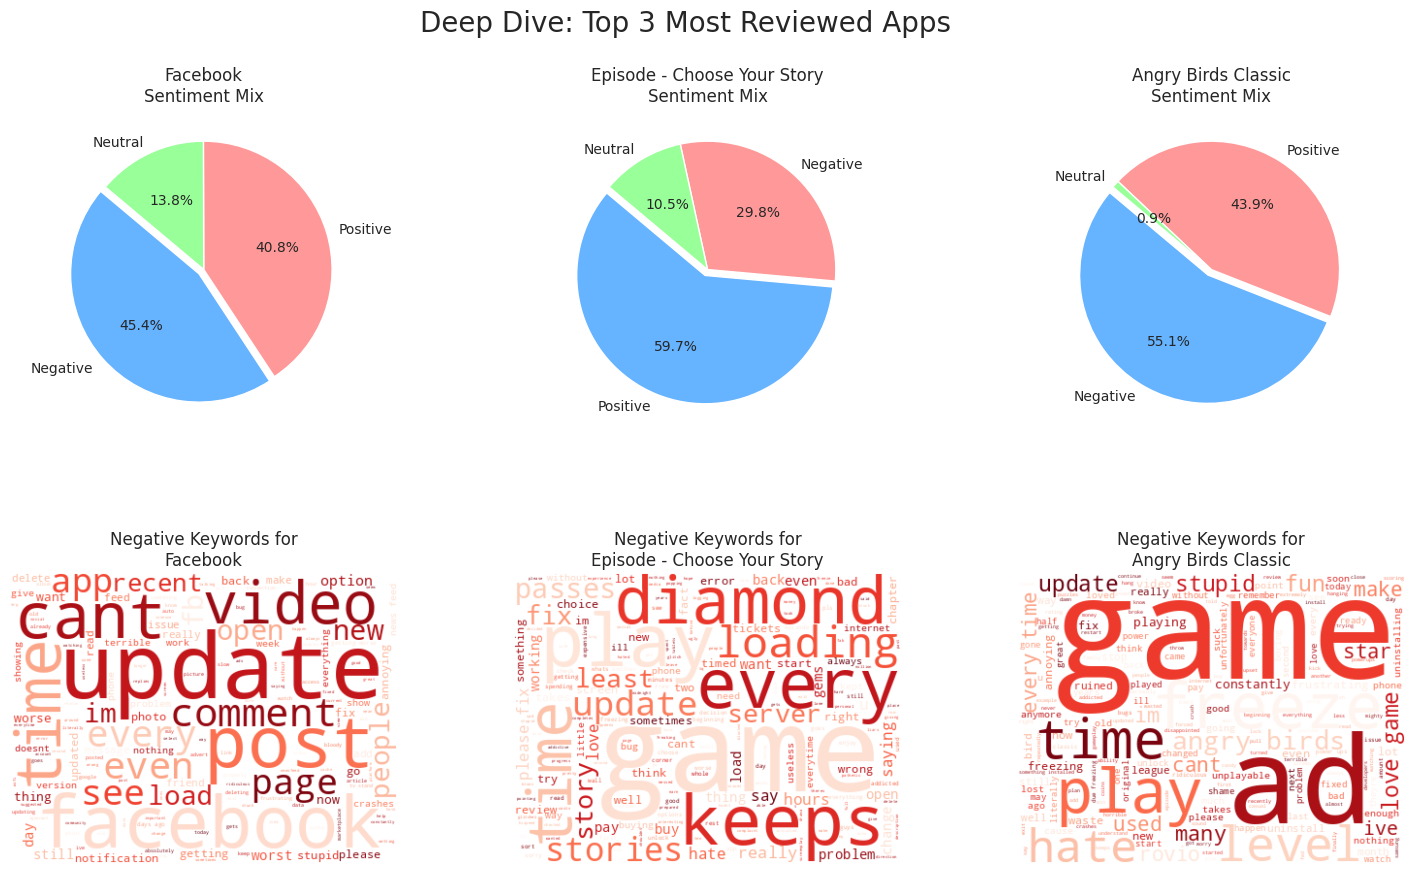

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Identify the Top 3 Apps by Review Count
top_3_apps = review_clean['App'].value_counts().head(3).index.tolist()
print(f"--- The Top 3 Most Reviewed Apps are: ---\n{top_3_apps}\n")

# Set up the visualization layout (2 Rows, 3 Columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Loop through each app to generate its specific charts
for i, app_name in enumerate(top_3_apps):
    
    # Filter data for this specific app
    app_data = review_clean[review_clean['App'] == app_name]
    
    # --- STATS PRINTING (For your PPT text) ---
    print(f"=== {app_name} Stats ===")
    print(f"Total Reviews: {len(app_data)}")
    print(f"Mean Polarity: {app_data['Sentiment_Polarity'].mean():.2f}")
    print(f"Mean Subjectivity: {app_data['Sentiment_Subjectivity'].mean():.2f}")
    print("-" * 30)

    # --- CHART 1: Sentiment Distribution (Pie Charts) ---
    # Placed in the Top Row (axes[0, i])
    counts = app_data['Sentiment'].value_counts()
    axes[0, i].pie(counts, labels=counts.index, autopct='%1.1f%%', 
                   startangle=140, colors=['#66b3ff', '#ff9999', '#99ff99'],
                   explode=[0.05 if x == counts.max() else 0 for x in counts])
    axes[0, i].set_title(f"{app_name}\nSentiment Mix")

    # --- CHART 2: Negative Word Clouds (The Specific Complaints) ---
    # Placed in the Bottom Row (axes[1, i])
    
    # Filter for negative reviews
    neg_reviews = app_data[app_data['Sentiment'] == 'Negative']
    
    if not neg_reviews.empty:
        text = " ".join(review for review in neg_reviews['Cleaned_Review'])
        # Create cloud
        wc = WordCloud(width=400, height=300, background_color='white', colormap='Reds').generate(text)
        axes[1, i].imshow(wc, interpolation='bilinear')
        axes[1, i].set_title(f"Negative Keywords for\n{app_name}")
    else:
        axes[1, i].text(0.5, 0.5, "No Negative Reviews", ha='center')
    
    axes[1, i].axis('off')

plt.suptitle('Deep Dive: Top 3 Most Reviewed Apps', fontsize=20)
plt.show()


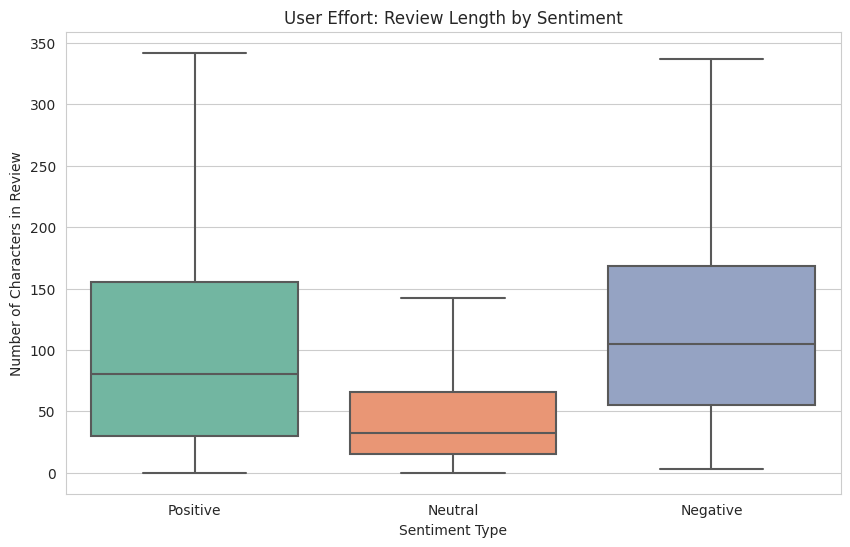

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length (number of characters) for each review
review_clean['Review_Length'] = review_clean['Cleaned_Review'].apply(len)

# Visual: Box Plot comparing lengths
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Review_Length', data=review_clean, 
            order=['Positive', 'Neutral', 'Negative'], palette='Set2', showfliers=False)

plt.title('User Effort: Review Length by Sentiment')
plt.ylabel('Number of Characters in Review')
plt.xlabel('Sentiment Type')
plt.show()